# SS164 Inequality Assignment

<font color='maroon'>Disclaimer: the assignment will be graded solely on **demonstrated understanding of the concepts** through the discussion and interpretation of the results. Code and analytical work will not be evaluated, nor should be submitted.</font> 

In this notebook, all you need to do is to change the chosen country below (from this [list of options](https://github.com/dianagold/SS164/blob/master/inequality/Countries_for_Inequality.csv)), and run all cells. If you have trouble running this code, alternatively, you can do the work manually. A detailed step-by-step is provided in the assignment and includes downloading the [zipfile from World Inequality Database](https://wid.world/bulk_download/wid_all_data.zip), extrating the csv of your country, filtering and sorting with Excel and pasting in [this interactive website](http://shlegeris.com/gini).

In [1]:
#Change here for the country you chose (must be spelled exactly the same as in the list of options)
chosencountry = 'Brazil'

## I. Setup
Import libraries

In [2]:
import os
import numpy as np
import pandas as pd
import wbgapi as wb
import urllib.request
from zipfile import ZipFile
from matplotlib import pyplot as plt
%matplotlib inline

Find chosen country in table with the list of options to store corresponding codes and year

In [3]:
countrytable = pd.read_csv('Countries_for_Inequality.csv')
chosenline = countrytable[countrytable['Country']==chosencountry]
widcode  = chosenline['WID_Code'].values[0]
wbgcode  = chosenline['WBG_Code'].values[0]
lastyear = chosenline['Latest Year'].values[0]
chosenline

,Country,WID_Code,WBG_Code,Latest Year,Note
8,Brazil,BR,BRA,2015,not allowed


Function to calculate the Gini index based on sorted array

In [4]:
def gini(arr):
    #sort array
    sorted_arr = arr.copy()
    sorted_arr.sort()
    n = arr.size
    coef_ = 2. / n
    const_ = (n + 1.) / n
    weighted_sum = sum([(i+1)*yi for i, yi in enumerate(sorted_arr)])
    return coef_*weighted_sum/(sorted_arr.sum()) - const_

Function to plot the Lorenz Curve from grouped data

In [5]:
def lorenz_curve(X):
    #Process data for Lorenz Curve
    X_lorenz = X.cumsum() / X.sum()
    X_lorenz = np.insert(X_lorenz, 0, 0) 
    X_lorenz[0], X_lorenz[-1]
    fig, ax = plt.subplots(figsize=[8,8])

    ##Plot of Lorenz curve
    ax.plot(np.arange(X_lorenz.size)/(X_lorenz.size-1), X_lorenz,marker='.',markevery=2, color='black')

    ## shade area
    ax.fill(np.arange(X_lorenz.size)/(X_lorenz.size-1), X_lorenz,color='grey')
    ax.fill_between(np.arange(X_lorenz.size)/(X_lorenz.size-1), X_lorenz,color='pink')

    ## line plot of equality
    ax.plot([0,1], [0,1], color='k')

    #plot gini index as a legend
    ax.text(0.1,0.9,'Gini Index = %f' %(gini(X)))

    #labels for plot
    ax.set_xlabel('Population')
    ax.set_ylabel('Cumulative Income share')

    ax.set_yticklabels([])
    ax.set_xticklabels([])
    plt.show()

Function to plot a histogram of income distribution

In [6]:
def inequality_plot(data):
  fig, ax = plt.subplots(figsize=[8,8])
  plt.bar([x for x in range(len(data))],data,width=1,color='grey')
  #labels for plot
  ax.set_xlabel('Percentage of population')
  ax.set_ylabel('Cumulative Income share')
  ax.set_xticks([])
  ax.set_xticklabels([])
  plt.show()

Function that plot graphs for chosen Data, Year, and Variable


In [7]:
def inequality(country,variable,year,division='percentile'):
  """
  country  = Country code for i.e BR is Brazil. Data is extracted for the respective country
  variable = One of the variables from  tptinc992j, tfiinc992j, tdiinc992j or tcainc992j. Income inequality data on the variable is extracted
  year     = Year for which you extract the income inequality data for
  division = Whether you want data in percentiles or deciles. The default is percentiles so if you want deciles, just pass the word 'decile' to the function
  """
  
  #Read csv file
  data = pd.read_csv('WID_data_'+country+'.csv', delimiter=';')

  #If you want data in percentiles
  if division == 'percentile' or division == 'percentiles':
    percentiles = []
    for i in range(100):
      percentiles.append('p'+str(i)+'p'+str(i+1))
    
    #Filter data according to student defined constraints
    inequality_data = []
    temp = data.loc[(data['variable'] == variable) & (data['year'] == year)]
    for i in percentiles:
      inequality_data.append(temp.loc[temp['percentile']==i]['value'].values[0])
    
    return lorenz_curve(np.array(inequality_data)), inequality_plot(np.array(inequality_data))

  elif division == 'decile' or division == 'deciles' :
    deciles = []
    for i in range(0,100,10):
      deciles.append('p'+str(i)+'p'+str(i+10))
    
    #Filter data according to student defined constraints
    inequality_data = []
    temp = data.loc[(data['variable'] == variable) & (data['year'] == year)]
    for i in deciles:
      inequality_data.append(temp.loc[temp['percentile']==i]['value'].values[0])
    
    return lorenz_curve(np.array(inequality_data)), inequality_plot(np.array(inequality_data))


Download data file from the [World Inequality Database (WID)](https://wid.world/data/), which is ~100Mb

In [8]:
if os.path.isfile('./wid_all_data.zip') :
    print('File already downloaded')
    
else :
    import zipfile

    url = 'https://wid.world/bulk_download/wid_all_data.zip'
    filename = 'wid_all_data.zip'

    urllib.request.urlretrieve(url, filename)

File already downloaded


Extract the contents of the chosen country and the whole word

In [9]:
with ZipFile('wid_all_data.zip', 'r') as zip_ref:
    for filename in ['WID_data_'+widcode+'.csv', 'WID_data_WO.csv']:
         zip_ref.extract(filename)

## II. Check four values for the Gini

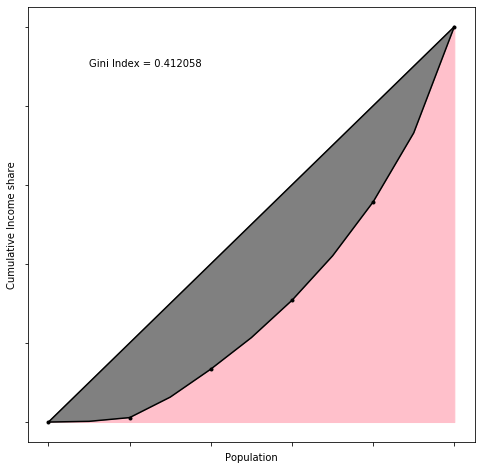

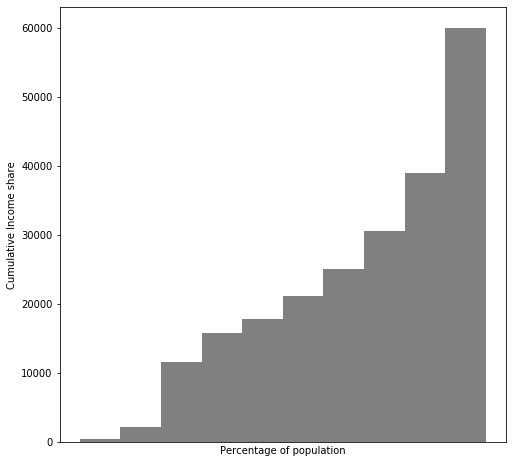

(None, None)

In [10]:
#Calculate Gini from WID income deciles
inequality(widcode,'tptinc992j',lastyear,'deciles')

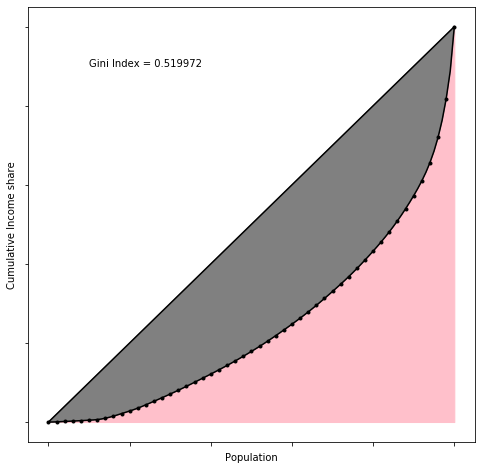

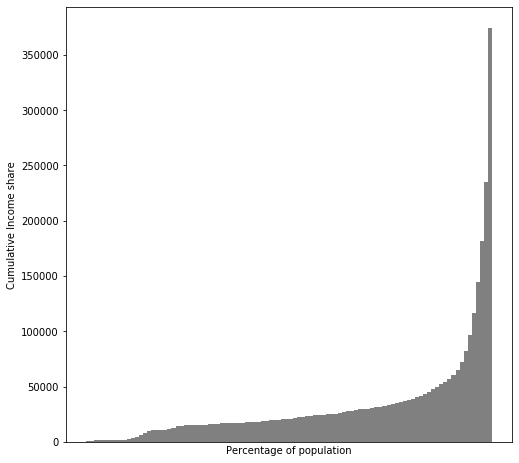

(None, None)

In [11]:
#Calculate Gini from WID income percentiles
inequality(widcode,'tptinc992j',lastyear)

Retrieve the Gini stored in the WID dataset

In [12]:
#Gini is coded as variable gptinc992j
cty   = pd.read_csv('WID_data_'+widcode+'.csv', delimiter=';')
gini  = cty[(cty['variable']=='gptinc992j') & (cty['year']==lastyear)]
gini

,country,variable,percentile,year,value,age,pop
16777,BR,gptinc992j,p0p100,2015,0.624942,992,j


Retrieve the Gini estimated by the World Bank in their World Development Indicators, available in [this website](https://data.worldbank.org/indicator/SI.POV.GINI?locations=BR&view=chart) or queried via API. Recent years are queried because there are many missing values. Report the value from the year that is the closest to the one you analyzed in WID 

In [13]:
wdi = wb.data.DataFrame('SI.POV.GINI', [wbgcode], time=range(2010, 2020), labels=True)
wdi

,Country,YR2010,YR2011,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019
BRA,Brazil,NaN,52.9,53.5,52.8,52.1,51.9,53.3,53.3,53.9,NaN


## III. Compare a poor/rich person in this country with the global distribution of income

The documentation explains that country files are in Local Currecy Unit (LCU), while the World file is in Euros. The PPP-adjusted exchange for the LCU is a variable in the country file.

In [14]:
#Exchange rate between Local Currency Unit and Euros
xrate = cty[(cty['variable']=='xlceux999i') & (cty['year']==lastyear)]['value'].values[0]
xrate

3.6910407999999997

In [15]:
#Poor peson and rich person in this country
poor = cty[(cty['variable']=='tptinc992j') & (cty['year']==lastyear) & (cty['percentile']=='p0p10')]['value'].values[0]
rich = cty[(cty['variable']=='tptinc992j') & (cty['year']==lastyear) & (cty['percentile']=='p90p100')]['value'].values[0]
print('Poor person in '+chosencountry+' makes '+np.array2string(poor, precision=0)+' in local currency unit, or '
      +np.array2string(poor/xrate, precision=0)+' in euro')
print('Rich person in '+chosencountry+' makes '+np.array2string(rich, precision=0)+' in local currency unit, or '
      +np.array2string(rich/xrate, precision=0)+' in euro')

Poor person in Brazil makes 388. in local currency unit, or 105. in euro
Rich person in Brazil makes 60003. in local currency unit, or 16256. in euro


What percentile of the world income distribution approximatly matches those values?

In [16]:
#Display world income distribution to find equivalence
world = pd.read_csv('WID_data_WO.csv', delimiter=';')
world = world[(world['variable'] == 'tptinc992j') & (world['year'] == 2016)]

percentiles = []
for i in range(100):
    percentiles.append('p'+str(i)+'p'+str(i+1))

pd.set_option('display.max_rows', None)
showme = world[world['percentile'].isin(percentiles)]

#This is not really sorted in numeric order, rather alphabetically
showme[['percentile','value']].sort_values('percentile')

,percentile,value
16155,p0p1,-1.350451e+07
37736,p10p11,1.155900e+03
5740,p11p12,1.243100e+03
39998,p12p13,1.330000e+03
38575,p13p14,1.414900e+03
8253,p14p15,1.501000e+03
19955,p15p16,1.579000e+03
42959,p16p17,1.660200e+03
7854,p17p18,1.742600e+03
41462,p18p19,1.818800e+03
